In [8]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
df_dengue = pd.read_excel(r'C:\Users\00157NLUC-BrenoR\pos_data_analytics-1\primeira_aula\Base de Dados Dengue.xlsx')


In [10]:
print(df_dengue)

                    municipio  uf data_infeccoes  qtd_infeccoes
0       ALTA FLORESTA D'OESTE  RO     2013-01-01             34
1       ALTA FLORESTA D'OESTE  RO     2013-02-01             44
2       ALTA FLORESTA D'OESTE  RO     2013-03-01             15
3       ALTA FLORESTA D'OESTE  RO     2013-04-01              4
4       ALTA FLORESTA D'OESTE  RO     2013-05-01              3
...                       ...  ..            ...            ...
728767               BRASILIA  DF     2023-08-01            939
728768               BRASILIA  DF     2023-09-01            843
728769               BRASILIA  DF     2023-10-01            686
728770               BRASILIA  DF     2023-11-01           1300
728771               BRASILIA  DF     2023-12-01           5603

[728772 rows x 4 columns]


In [11]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3


In [12]:
df_dengue.tail()

,municipio,uf,data_infeccoes,qtd_infeccoes
728767,BRASILIA,DF,2023-08-01,939
728768,BRASILIA,DF,2023-09-01,843
728769,BRASILIA,DF,2023-10-01,686
728770,BRASILIA,DF,2023-11-01,1300
728771,BRASILIA,DF,2023-12-01,5603


# Explorando dataset

In [13]:
print(f'Tamanho do nosso dataframe: {df_dengue.shape}')

Tamanho do nosso dataframe: (728772, 4)


Existe valores nulos?

In [14]:
print(f'Quantidade de dados nulos: {df_dengue.isnull().sum().sum()}')

Quantidade de dados nulos: 0


In [15]:
df_dengue.isnull()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
728767,False,False,False,False
728768,False,False,False,False
728769,False,False,False,False
728770,False,False,False,False


In [16]:
df_dengue.isnull().sum()

municipio         0
uf                0
data_infeccoes    0
qtd_infeccoes     0
dtype: int64

In [17]:
df_dengue.isnull().sum().sum()

np.int64(0)

Informações sobre a base

In [18]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


Verificar os valores únicos?


In [19]:
df_dengue.nunique()

municipio         5243
uf                  27
data_infeccoes     132
qtd_infeccoes     1157
dtype: int64

Precisamos calcular a quantidade de pessoas que pegaram dengue por municipio por ano

In [20]:
#Criar uma nova coluna com o ano
df_dengue['ano'] = df_dengue['data_infeccoes'].dt.year

In [21]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes,ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013


In [22]:
infeccpes_municipio_ano = df_dengue.groupby(['ano', 'municipio', 'uf'])['qtd_infeccoes'].sum().reset_index()

In [23]:
infeccpes_municipio_ano.head()

,ano,municipio,uf,qtd_infeccoes
0,2013,ABADIA DE GOIAS,GO,52
1,2013,ABADIA DOS DOURADOS,MG,0
2,2013,ABADIANIA,GO,37
3,2013,ABAETE,MG,486
4,2013,ABAETETUBA,PA,15


In [24]:
infeccpes_municipio_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60731 entries, 0 to 60730
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            60731 non-null  int32 
 1   municipio      60731 non-null  object
 2   uf             60731 non-null  object
 3   qtd_infeccoes  60731 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.6+ MB


Agrupar por estado e ano

In [25]:
infeccoes_estado = df_dengue.groupby(['ano', 'uf'])['qtd_infeccoes'].sum().reset_index()   

In [26]:
infeccoes_estado.head()

,ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417


Estatistica Descritiva

In [27]:
infeccoes_estado.describe()

,ano,qtd_infeccoes
count,297.000000,297.000000
mean,2018.000000,12872.474747
std,3.167615,31630.107741
min,2013.000000,0.000000
25%,2015.000000,780.000000
50%,2018.000000,2229.000000
75%,2021.000000,10098.000000
max,2023.000000,286000.000000


In [28]:
infeccoes_estado.shape

(297, 3)

Interpretação da estatisca descritiva utilizando o gráfico de boxplot

In [29]:
#libs de visualização

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='qtd_infeccoes'>

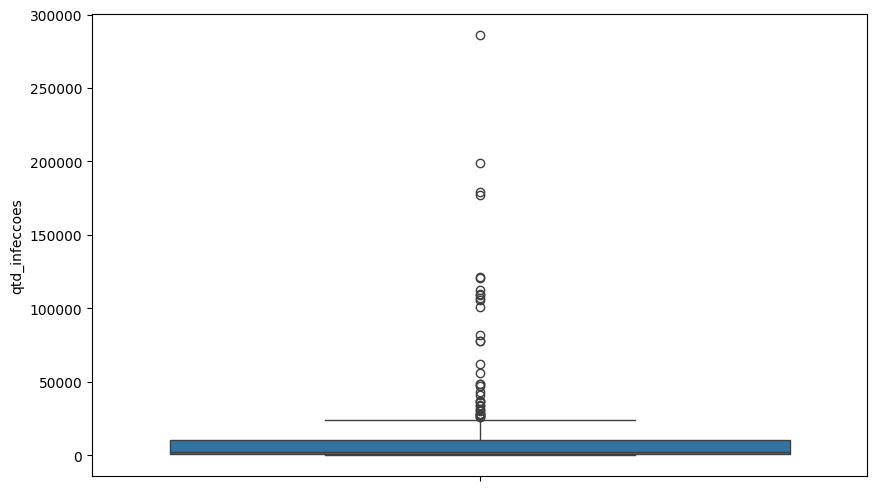

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data = infeccoes_estado, y= 'qtd_infeccoes')

C:\Users\00157NLUC-BrenoR\AppData\Local\Temp\ipykernel_25580\2412094611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = infeccoes_estado, x='ano', y='qtd_infeccoes', palette= 'viridis')


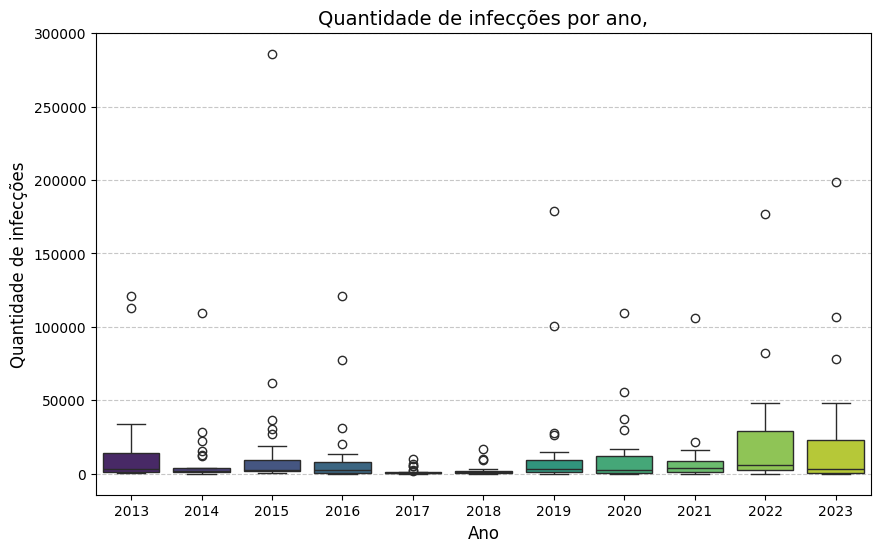

In [31]:
#Criar gráfico de boxplot compartilhando a quantidade de infecções por ano

plt.figure(figsize=(10,6))
sns.boxplot(data = infeccoes_estado, x='ano', y='qtd_infeccoes', palette= 'viridis')

#Personalizando o gráfico
plt.title('Quantidade de infecções por ano,', fontsize=14)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Quantidade de infecções', fontsize=12)
plt.grid(axis = 'y', linestyle='--', alpha=0.7)
plt.show()

Vamos olhar o ano de 2023

In [32]:
#Filtrar os dados para o ano de 2023
infeccoes_estado_2023 = infeccoes_estado[infeccoes_estado['ano'] == 2023]

In [33]:
infeccoes_estado_2023.head()

,ano,uf,qtd_infeccoes
270,2023,AC,1781
271,2023,AL,473
272,2023,AM,3263
273,2023,AP,742
274,2023,BA,13249


Entendendo o ano de 2023

In [34]:
infeccoes_estado_2023.describe()

,ano,qtd_infeccoes
count,27.0,27.000000
mean,2023.0,22902.888889
std,0.0,43368.215001
min,2023.0,0.000000
25%,2023.0,744.000000
50%,2023.0,3263.000000
75%,2023.0,22696.000000
max,2023.0,198774.000000


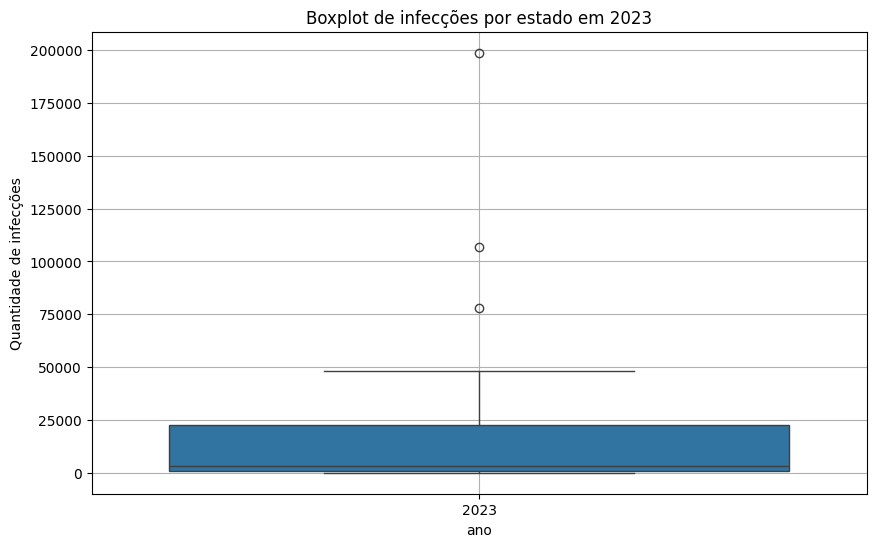

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data = infeccoes_estado_2023, x='ano', y='qtd_infeccoes')
plt.title('Boxplot de infecções por estado em 2023')
plt.ylabel('Quantidade de infecções')
plt.grid(True)
plt.show()

In [36]:
#lib de visualização plotly
import plotly.express as px 

In [42]:
fig = px.box(infeccoes_estado_2023, y='qtd_infeccoes', title='Boxplot de infecções por estado em 2023')
fig.show()

Comparação, utilizar gráfico de barras